# Third-Phase-Evaluation-Projects--1-

# Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Table of Content

In [1]:
Importing Neccessary Libraries

SyntaxError: invalid decimal literal (4243919299.py, line 1)

# 1.Importing Necessary Libraries

In [2]:
# Data Analysis & Manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Treatment, Peprocessor, Scaler
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Saving Model
import joblib

# Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [3]:
# Define the URL of the CSV file
url = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv"

# Read the data from the URL into a pandas DataFrame
df = pd.read_csv(url)


In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EXTRAPLOTARY DATA ANALYSIS

In [5]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [9]:
df.shape

(32560, 15)

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
# Separate columns by numerical and categorical types
numerical_columns = df.select_dtypes(include=['int64'])
categorical_columns = df.select_dtypes(include=['object'])

print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
       Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0       50   83311             13             0             0              13
1       38  215646              9             0             0              40
2       53  234721              7             0             0              40
3       28  338409             13             0             0              40
4       37  284582             14             0             0              40
...    ...     ...            ...           ...           ...             ...
32555   27  257302             12             0             0              38
32556   40  154374              9             0             0              40
32557   58  151910              9             0             0              40
32558   22  201490              9             0             0              20
32559   52  287927              9         15024             0              40

[32560 rows x 6 columns]

Categorical Column

In [13]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [14]:

# Iterate through each column and print the frequencies of unique values
for col in categorical_columns:
    uniques = df[col].unique()
    print(f"Unique values in column {col}:")
    print(uniques)
    print("\n")
    

Unique values in column Workclass:
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Unique values in column Education:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Unique values in column Marital_status:
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']


Unique values in column Occupation:
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']


Unique values in column Relationship:
[' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


Unique values in column Race

In [15]:
for i in categorical_columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('-----------------------------------')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-----------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
-----------------------------------
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int6

# CHECKING FOR DUPLICATE VALUES

In [16]:
df.duplicated().sum()

24

THE DATA SET CONTAINS 24 DUPLICATES WHICH CAN CAUSE MALFUNCTION IN FUTURE PROCESSES THUS IT IS BETTER TO REMOVE THEM

In [17]:
#Dropping Duplocate values
df.drop_duplicates(keep='last', inplace=True)

In [18]:
df.duplicated().sum()

0

NOW THE DATA SET IS FREE OF ANY DUPLICATES

# CHECKING NULL VALUES

In [19]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

THE DATA IS FREE OF ANY NULL VALUES BUT STILL NOT READY FOR FUTHER PREOCESSES

AS THE DATA CONTAINS AN UNSUAL VALUE "?" FINDING IT AND TREATING IT

In [20]:
for col in df.columns:
    frequencies = df[col].astype(str).str.strip().value_counts().get('?', 0)
     # Count
    print(f"Frequency of '?' in column {col}: {frequencies}", "\n")
     # Percentage
    print(f"Frequency of '?' in column {col}:", frequencies/32560*100, "%", "\n")

Frequency of '?' in column Age: 0 

Frequency of '?' in column Age: 0.0 % 

Frequency of '?' in column Workclass: 1836 

Frequency of '?' in column Workclass: 5.638820638820639 % 

Frequency of '?' in column Fnlwgt: 0 

Frequency of '?' in column Fnlwgt: 0.0 % 

Frequency of '?' in column Education: 0 

Frequency of '?' in column Education: 0.0 % 

Frequency of '?' in column Education_num: 0 

Frequency of '?' in column Education_num: 0.0 % 

Frequency of '?' in column Marital_status: 0 

Frequency of '?' in column Marital_status: 0.0 % 

Frequency of '?' in column Occupation: 1843 

Frequency of '?' in column Occupation: 5.66031941031941 % 

Frequency of '?' in column Relationship: 0 

Frequency of '?' in column Relationship: 0.0 % 

Frequency of '?' in column Race: 0 

Frequency of '?' in column Race: 0.0 % 

Frequency of '?' in column Sex: 0 

Frequency of '?' in column Sex: 0.0 % 

Frequency of '?' in column Capital_gain: 0 

Frequency of '?' in column Capital_gain: 0.0 % 

Frequen

AS ONLY THREE COLUMN CONTAIN THE "?" WHICH ARE OCCUPATION, WORKCLASS, NATIVE_COUNTRY REPLACING "?" VALU WITH THE MODE OR THE MOST FREQUENT VALUE  IN THE COLUMN TO PROCEED WITH THE DATA AS THE MISSING VALUE MAY CAUSE ERROR.

In [21]:
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass          True
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation         True
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country     True
Income            False
dtype: bool

In [22]:
df = df.replace([' ', 'NA', '-', ' ?'], np.NaN)

In [23]:
df.isin([' ','NA','-',' ?']).any()

Age               False
Workclass         False
Fnlwgt            False
Education         False
Education_num     False
Marital_status    False
Occupation        False
Relationship      False
Race              False
Sex               False
Capital_gain      False
Capital_loss      False
Hours_per_week    False
Native_country    False
Income            False
dtype: bool

In [24]:
# Imputating Missing value with mode for categorical features
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [25]:
for col in df.columns:
    # Convert column values to string before using .str accessor
    frequencies = df[col].astype(str).str.strip().value_counts().get('?', 0)
    print(f"Frequency of '?' in column {col}: {frequencies}", "\n")


Frequency of '?' in column Age: 0 

Frequency of '?' in column Workclass: 0 

Frequency of '?' in column Fnlwgt: 0 

Frequency of '?' in column Education: 0 

Frequency of '?' in column Education_num: 0 

Frequency of '?' in column Marital_status: 0 

Frequency of '?' in column Occupation: 0 

Frequency of '?' in column Relationship: 0 

Frequency of '?' in column Race: 0 

Frequency of '?' in column Sex: 0 

Frequency of '?' in column Capital_gain: 0 

Frequency of '?' in column Capital_loss: 0 

Frequency of '?' in column Hours_per_week: 0 

Frequency of '?' in column Native_country: 0 

Frequency of '?' in column Income: 0 



# SKEWNES CHECKING AND TREATING

In [26]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

THE DATA IS PROPERLY SKEWED :
These are the coefficients of each feature in a linear regression model. 

- Age has a coefficient of 0.558, indicating that for every one unit increase in age, the predicted target variable also increases by 0.558 units.
- Fnlwgt has a coefficient of 1.448, indicating a positive relationship with the target variable.
- Education_num has a coefficient of -0.309, indicating a negative relationship with the target variable.
- Capital_gain has a coefficient of 11.949, indicating a strong positive relationship with the target variable.
- Capital_loss has a coefficient of 4.593, indicating a positive relationship with the target variable.
- Hours_per_week has a coefficient of 0.229, indicating a positive relationship with the target variable.

# DATA VISUALIZATION

Univariate Analysis - Data Visualization


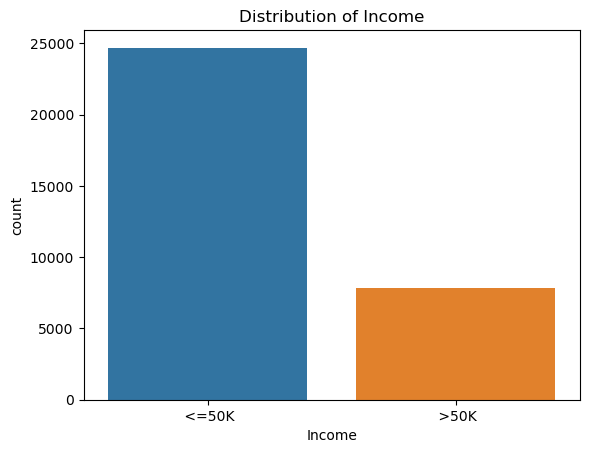

In [27]:
#Count plot for 'Income'
sns.countplot(data=df, x='Income')
plt.title('Distribution of Income')
plt.show()


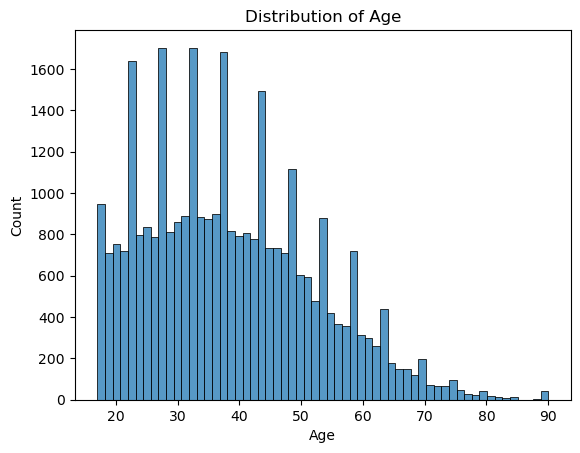

In [28]:

#Histogram for 'Age'
sns.histplot(data=df, x='Age') 
plt.title('Distribution of Age') 
plt.show()


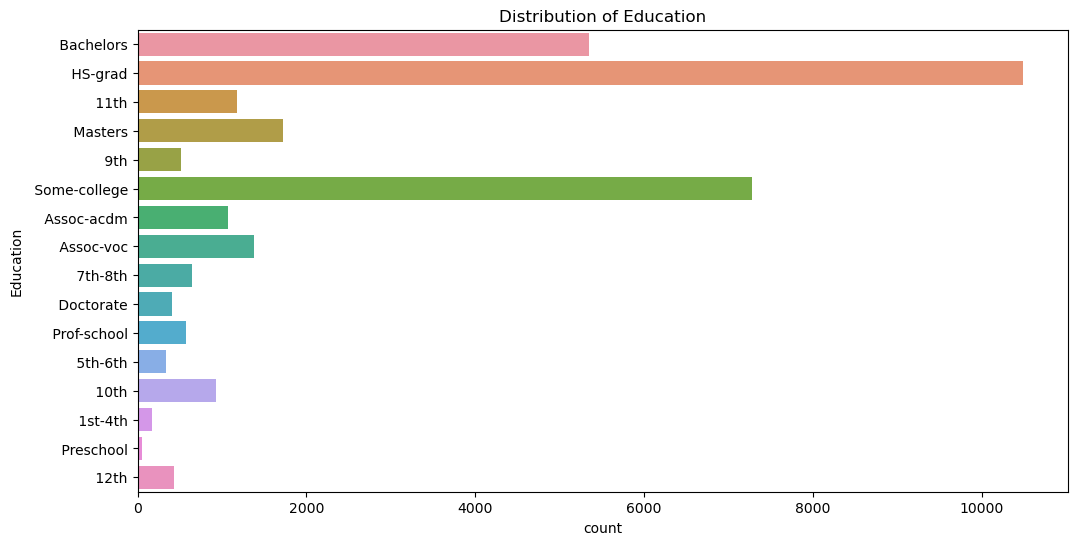

In [29]:

#Count plot for 'Education'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Education')
plt.title('Distribution of Education')
plt.show()


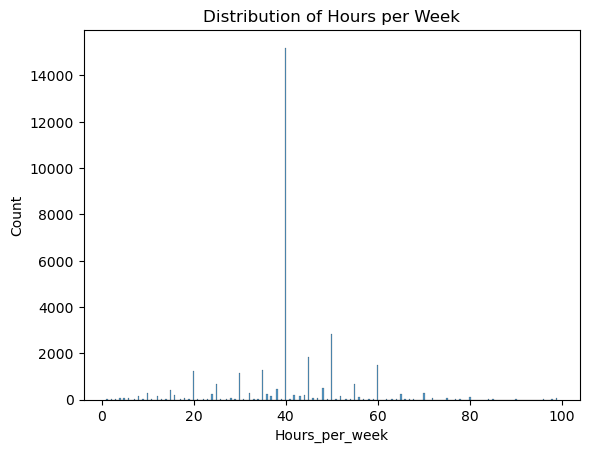

In [30]:

#Histogram for 'Hours_per_week'
sns.histplot(data=df, x='Hours_per_week')
plt.title('Distribution of Hours per Week')
plt.show()

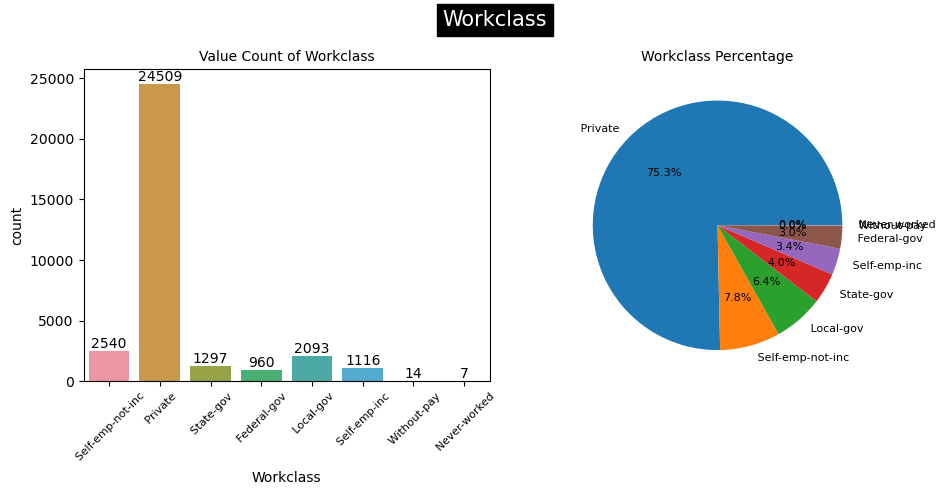

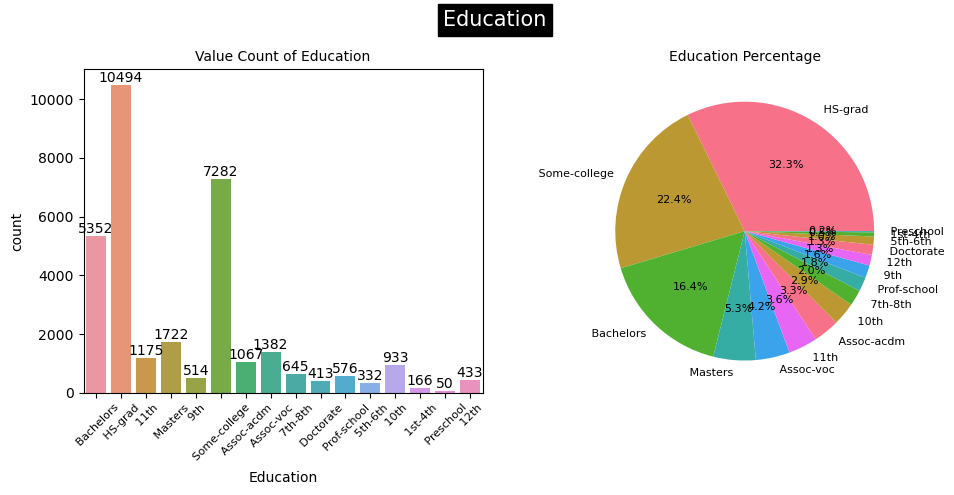

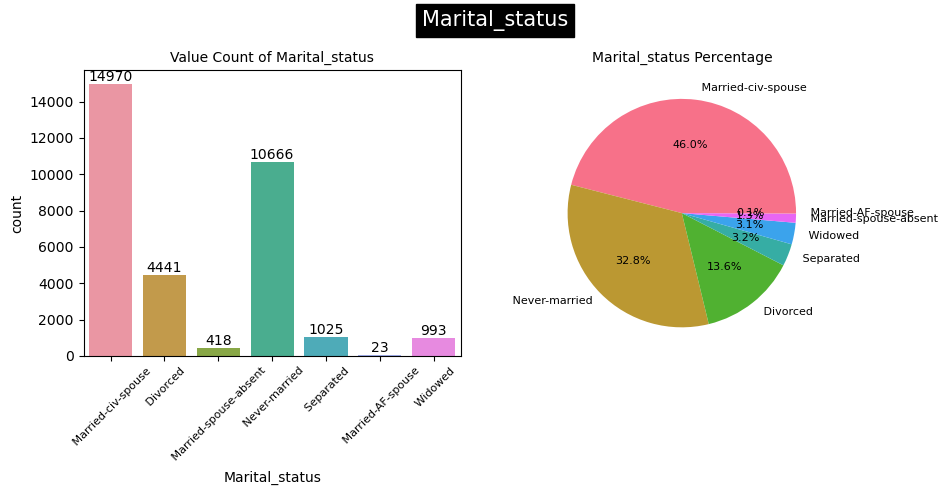

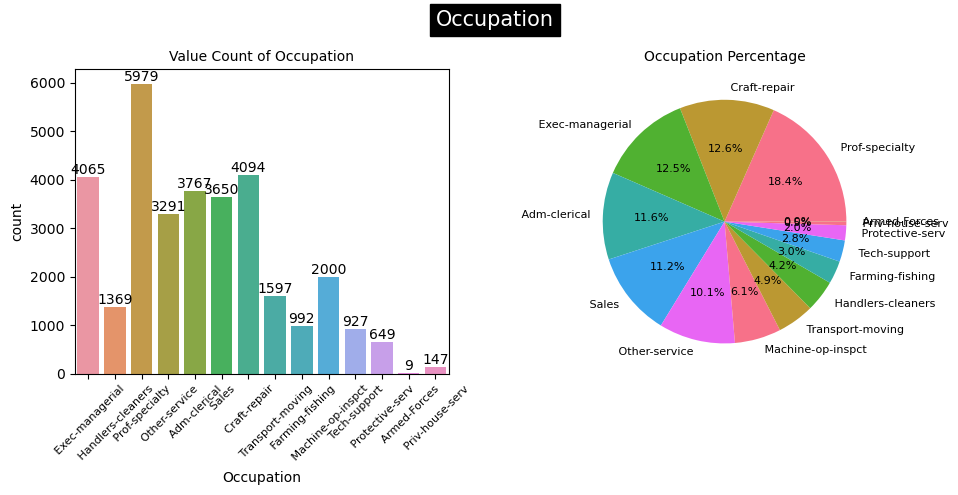

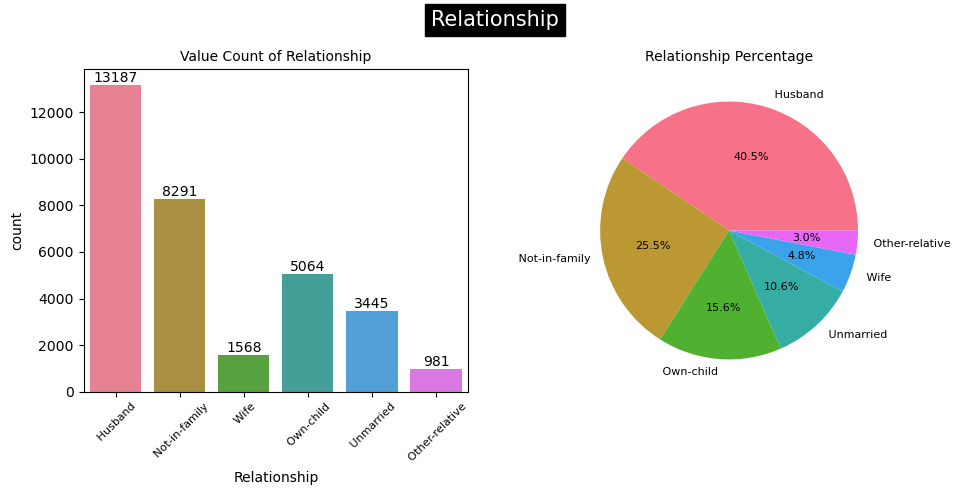

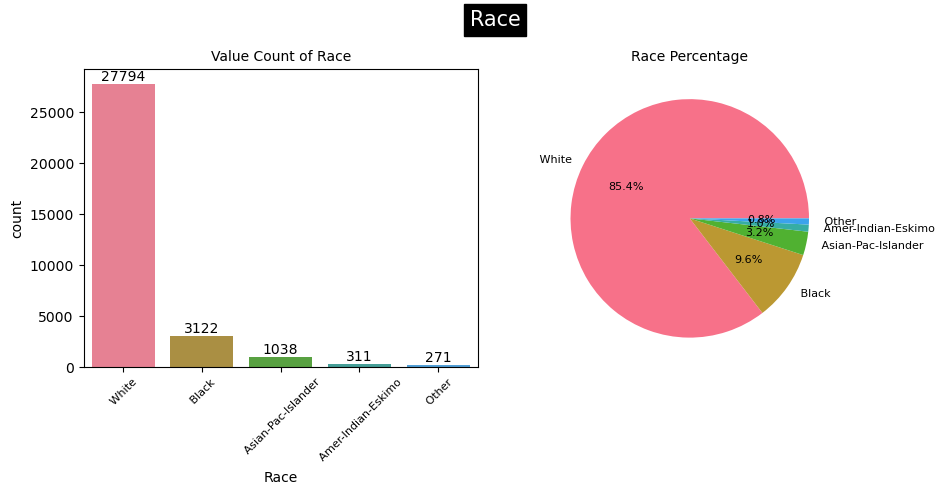

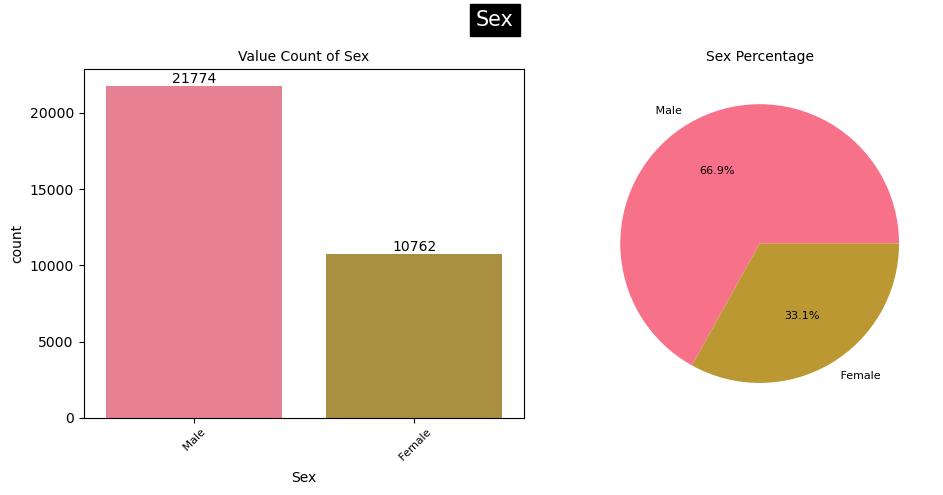

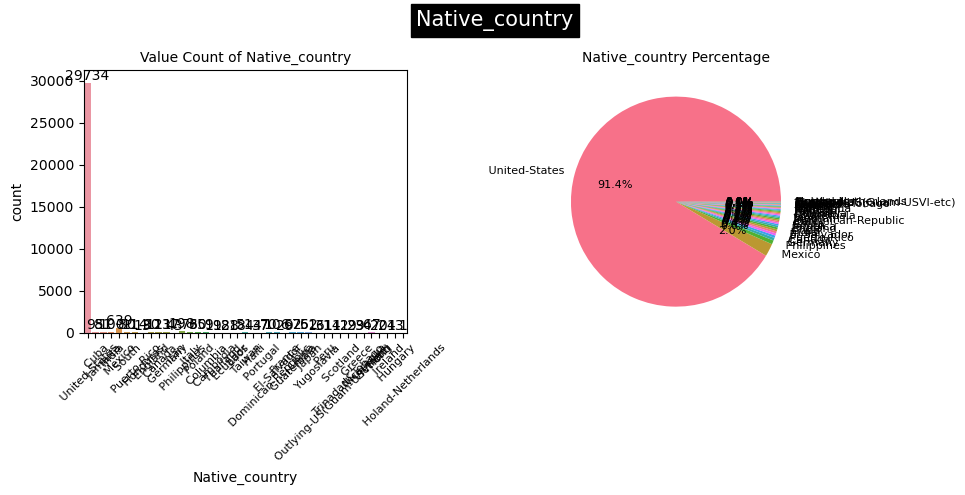

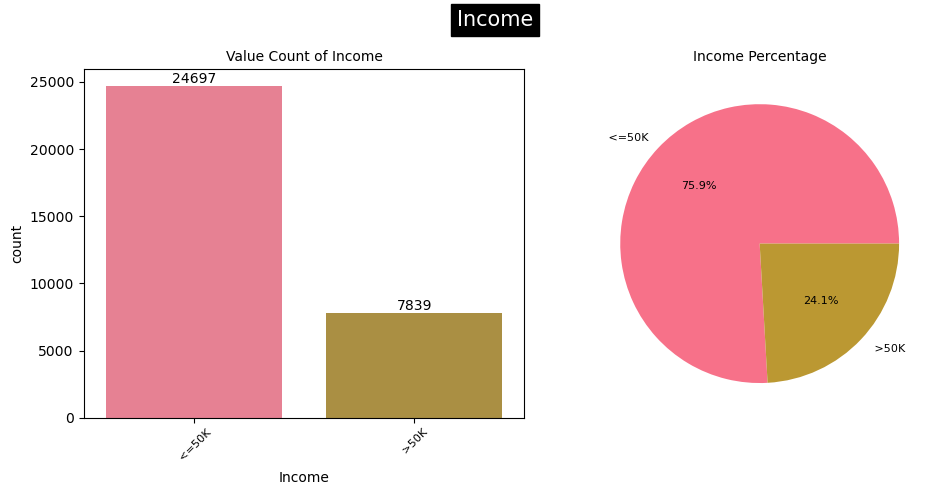

In [31]:
#Visualizing it
cat_col = categorical_columns[:-1]

#Iterate over Categorical column
for i, column in enumerate(cat_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("husl")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', textprops={'fontsize': 8})
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

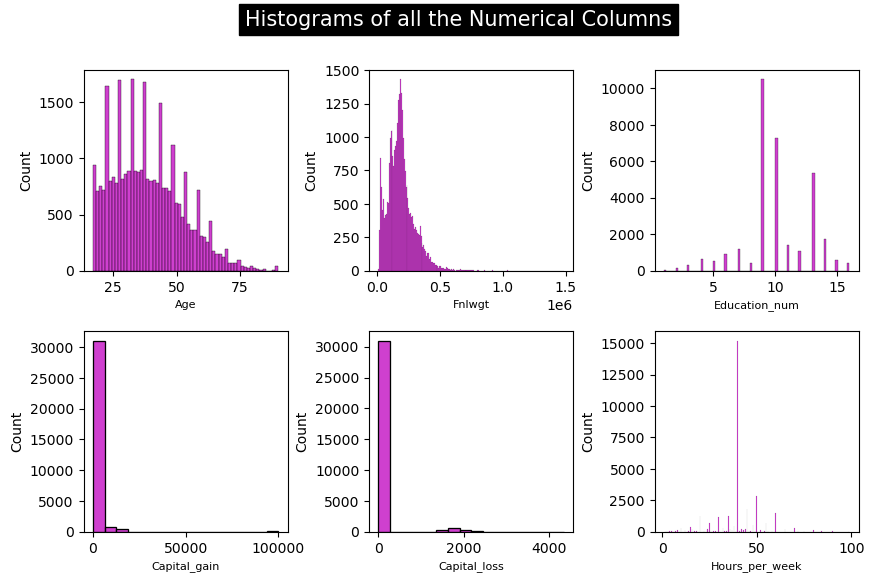

In [32]:
#Visiualizing it using Histogram
plt.figure(figsize=(10,6), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1

plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.suptitle("Histograms of all the Numerical Columns", fontsize=15, backgroundcolor='black',color='white')
plt.show()

BI VARIATE ANALYSIS

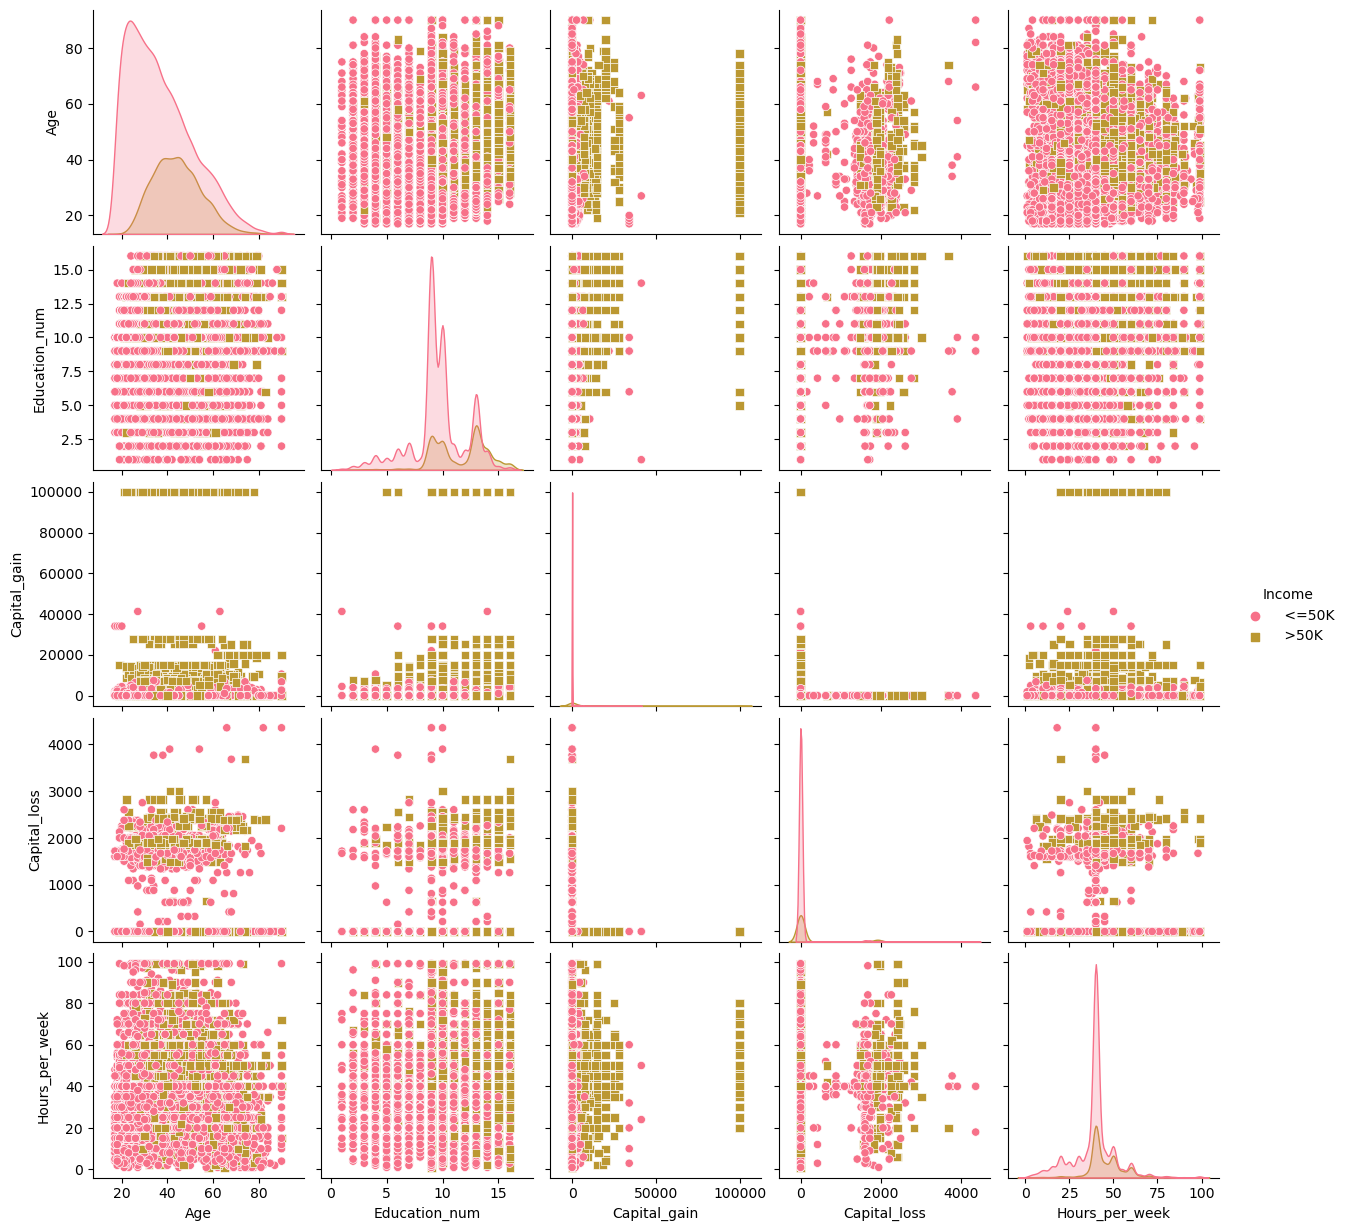

In [33]:
# Subset the data with selected columns
df_subset = df[['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Income']]

# Create a pairplot
sns.pairplot(df_subset, hue='Income', markers=['o', 's'])
plt.show()

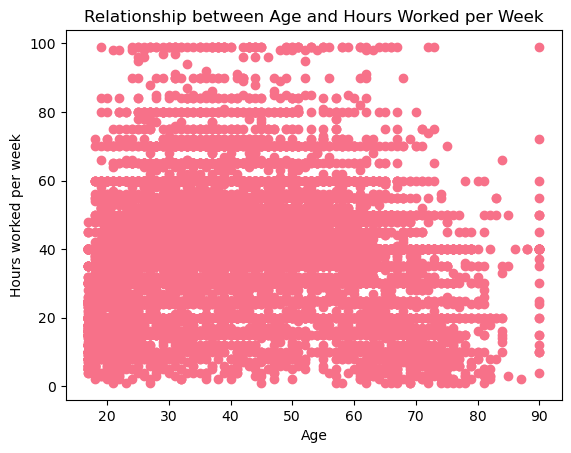

In [34]:
plt.scatter(df["Age"], df["Hours_per_week"])  # Example for Age vs. Hours_per_week
plt.xlabel("Age")
plt.ylabel("Hours worked per week")
plt.title("Relationship between Age and Hours Worked per Week")
plt.show()

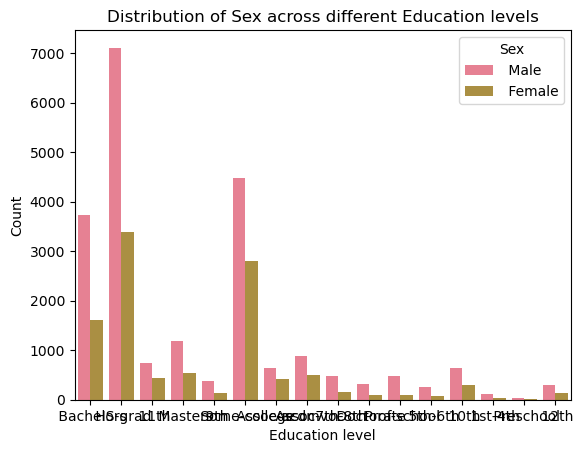

In [35]:
sns.countplot(x="Education", hue="Sex", data=df)  # Example for Education vs. Sex
plt.xlabel("Education level")
plt.ylabel("Count")
plt.title("Distribution of Sex across different Education levels")
plt.show()

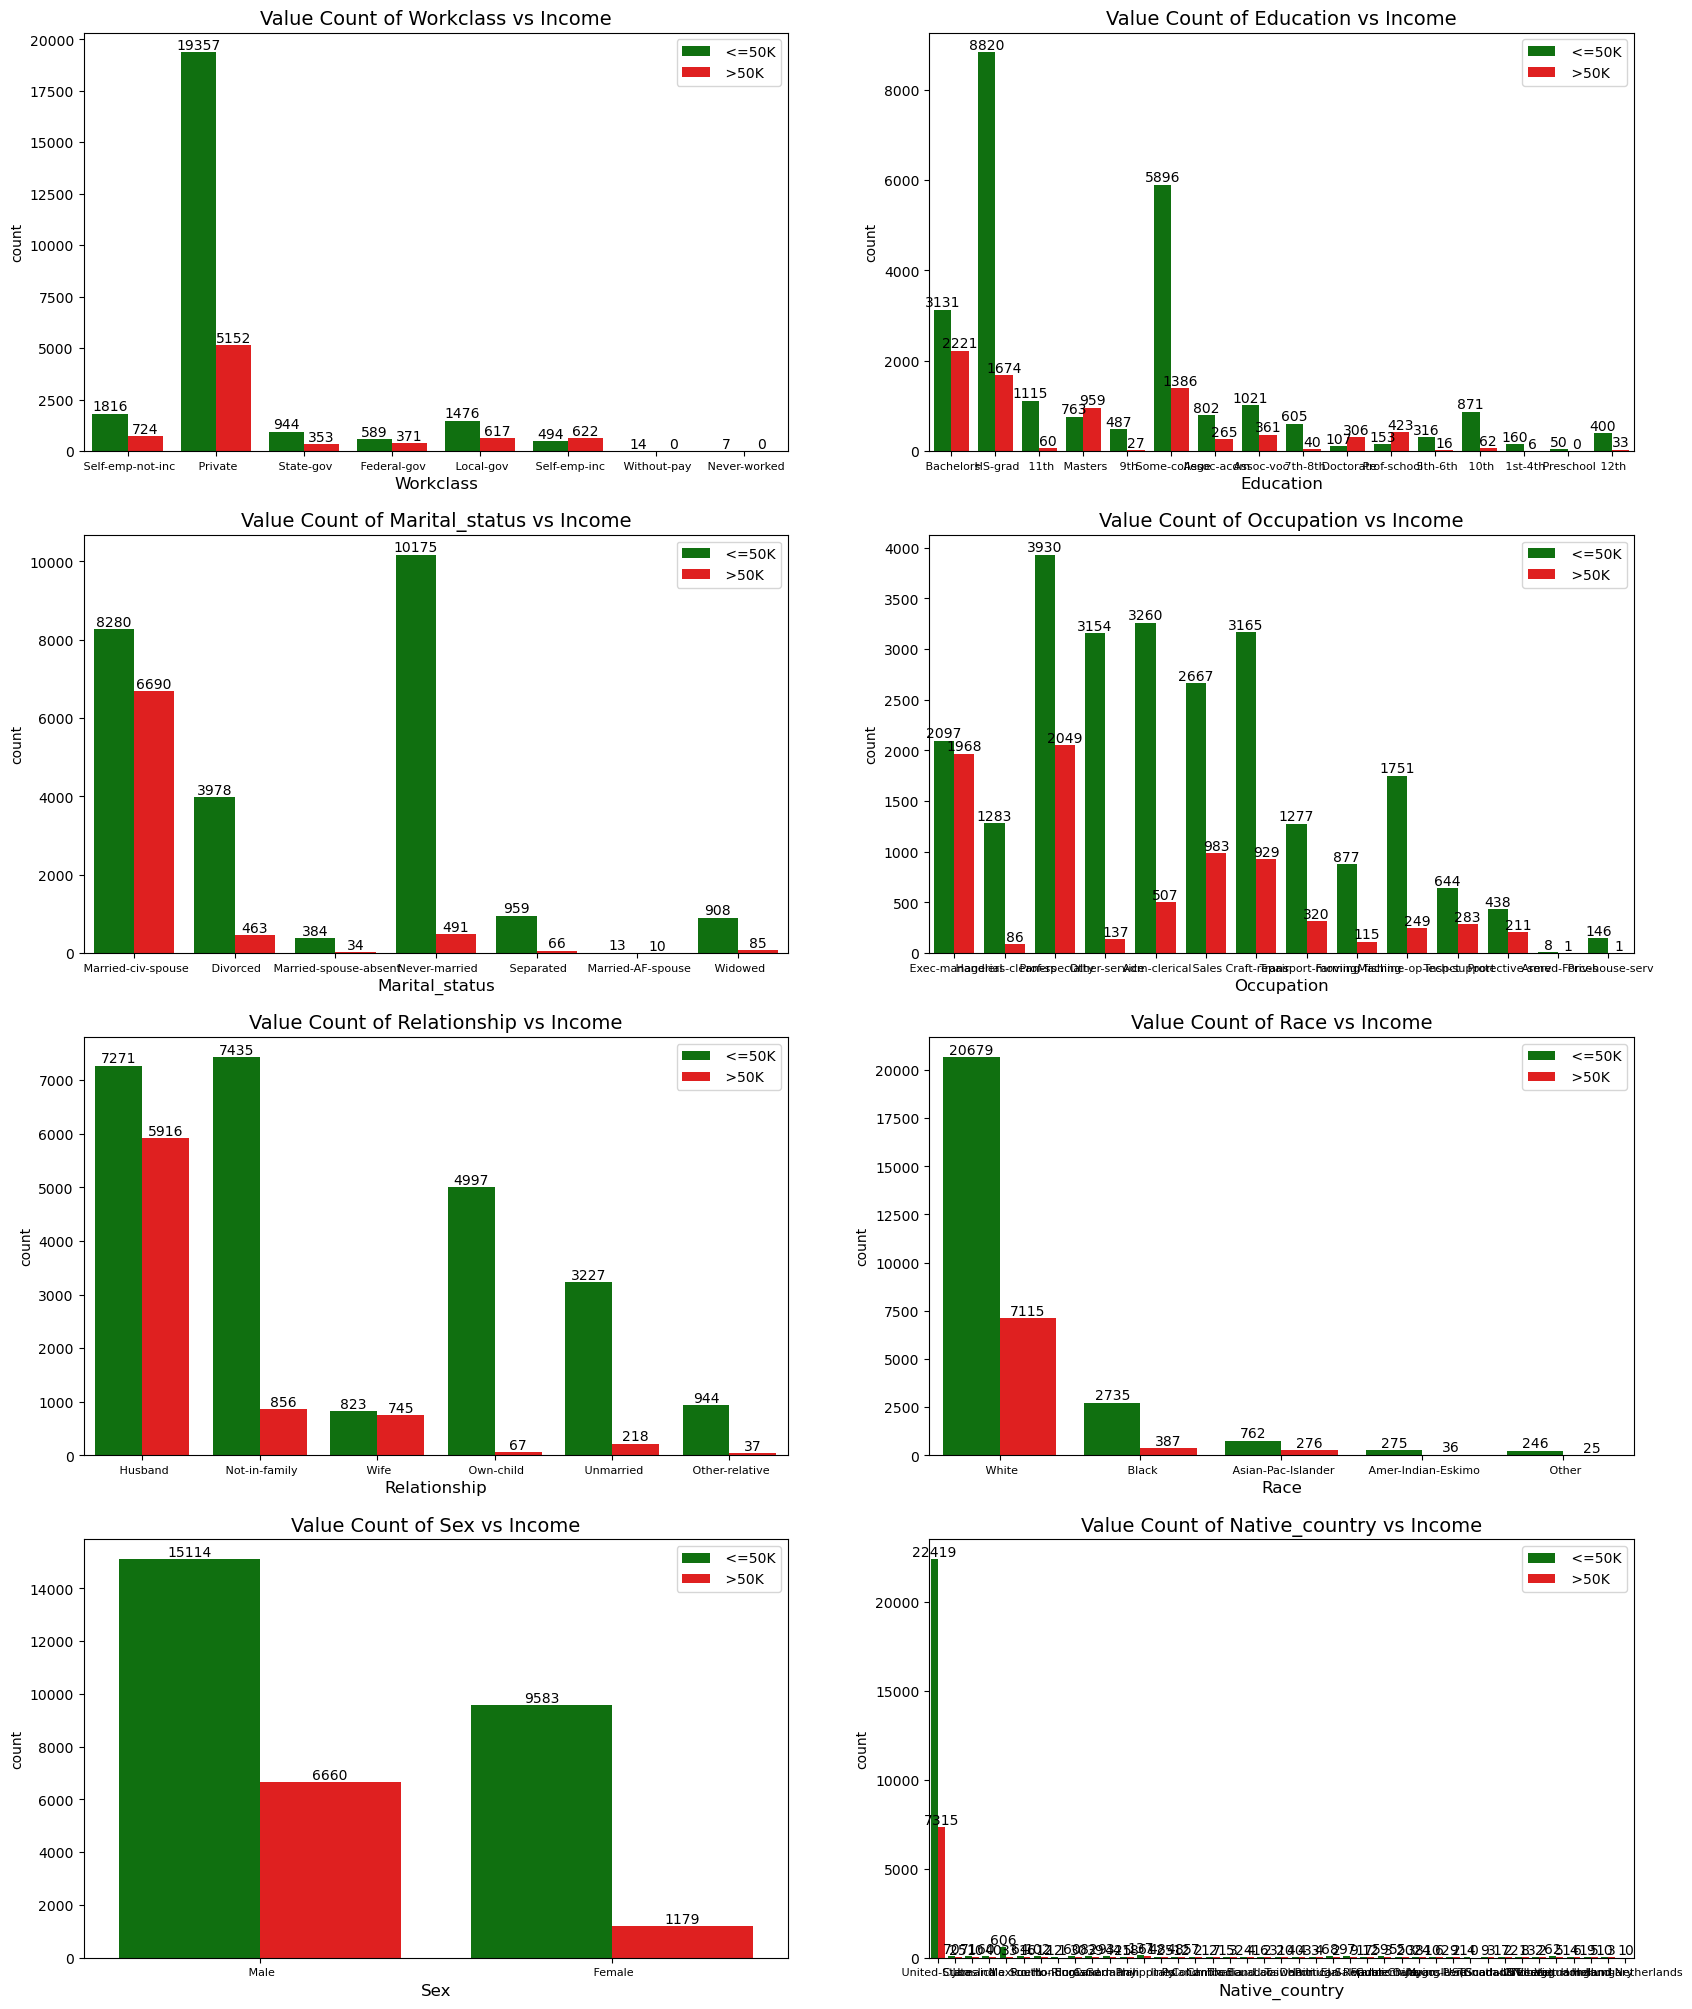

In [36]:
# Visualization of Categorical column Vs Income
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=8:
        plt.subplot(4,2,p)
        custom_palette = {" <=50K": "g", " >50K": "r"} ## Define a custom color palette
        ax= sns.countplot(x=i, hue='Income',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Income', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

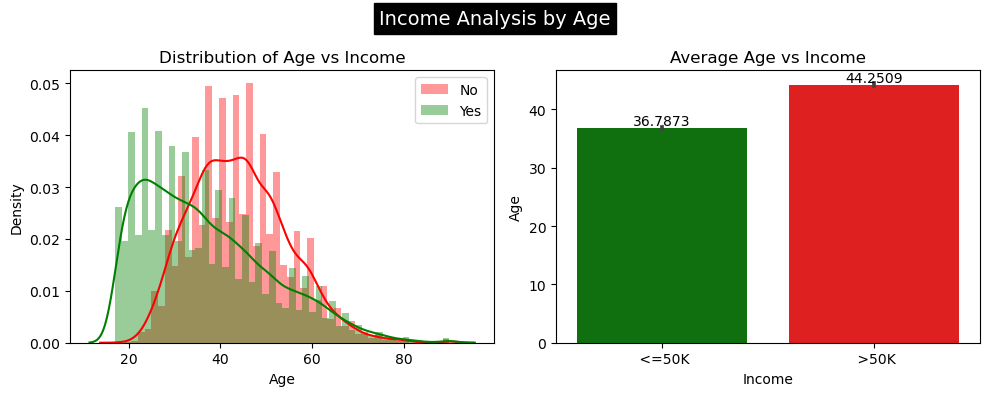

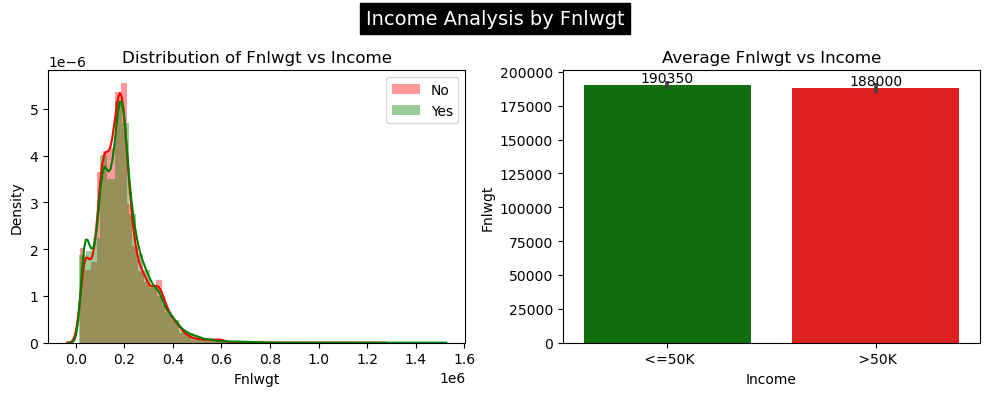

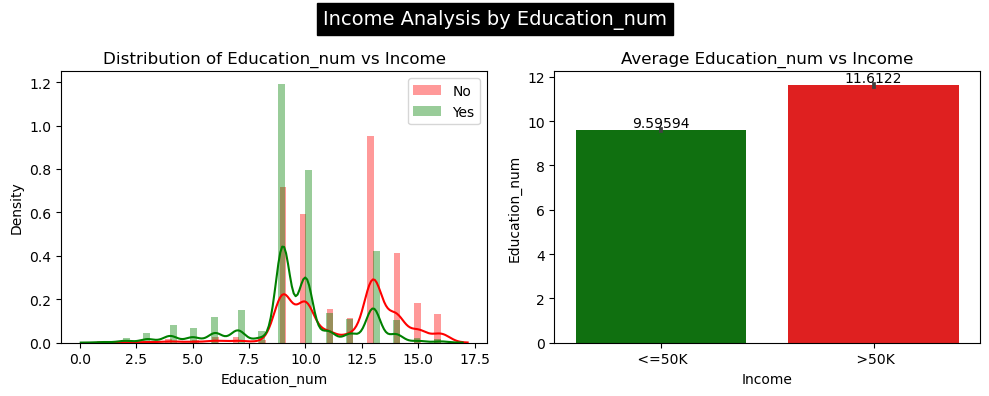

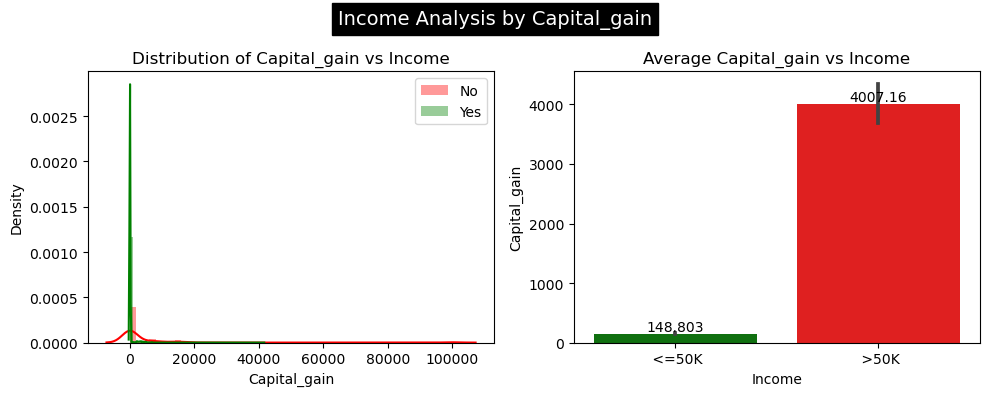

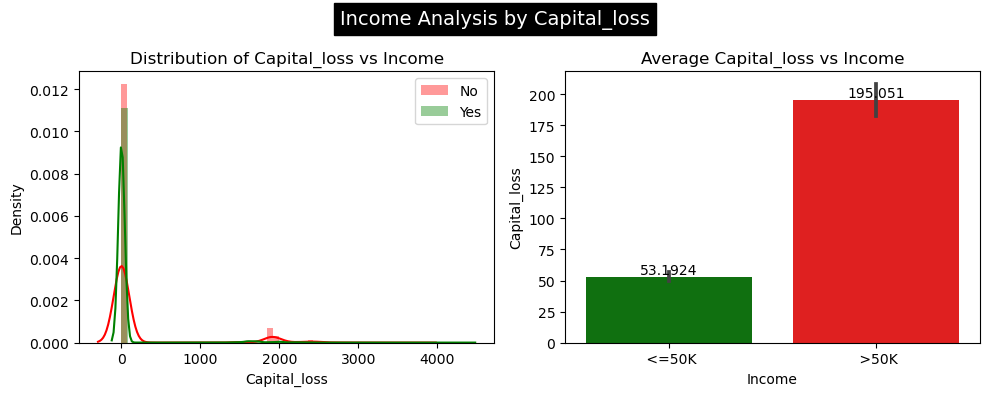

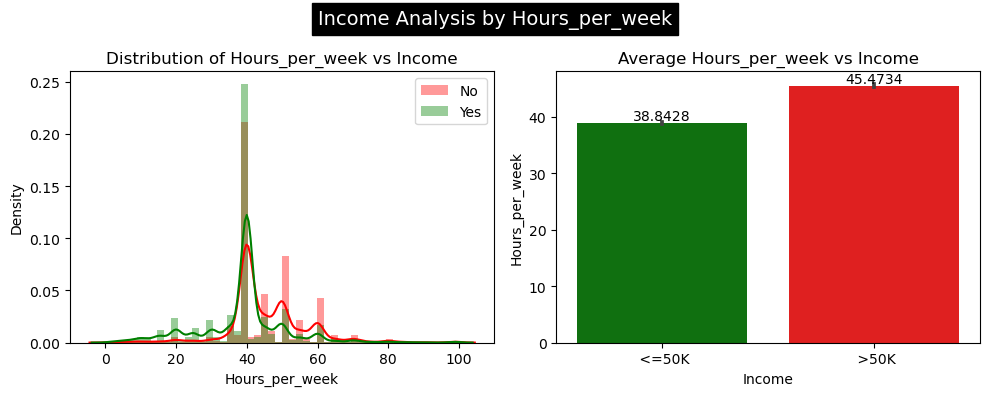

In [37]:
# Visualizing it:
for i in numerical_columns:
    
    #create Subplots
    fig, axes =plt.subplots(1,2,figsize=(10,4))
    
    # First Plot: Distribution of Numerical columns vs Income
    sns.distplot(df[df['Income']==" >50K"][i], label= "No", color='r', ax=axes[0])
    sns.distplot(df[df['Income']==" <=50K"][i],label="Yes", color='g', ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs Income")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Income
    ax=sns.barplot(x='Income', y=i, data=df, palette={" <=50K": "g", " >50K": "r"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs Income')
    
    fig.suptitle(f"Income Analysis by {i}", fontsize=14, backgroundcolor='black',color='white')  # Add a specific title for this column
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

# OUTLIER DETECTION AND TREATMENT

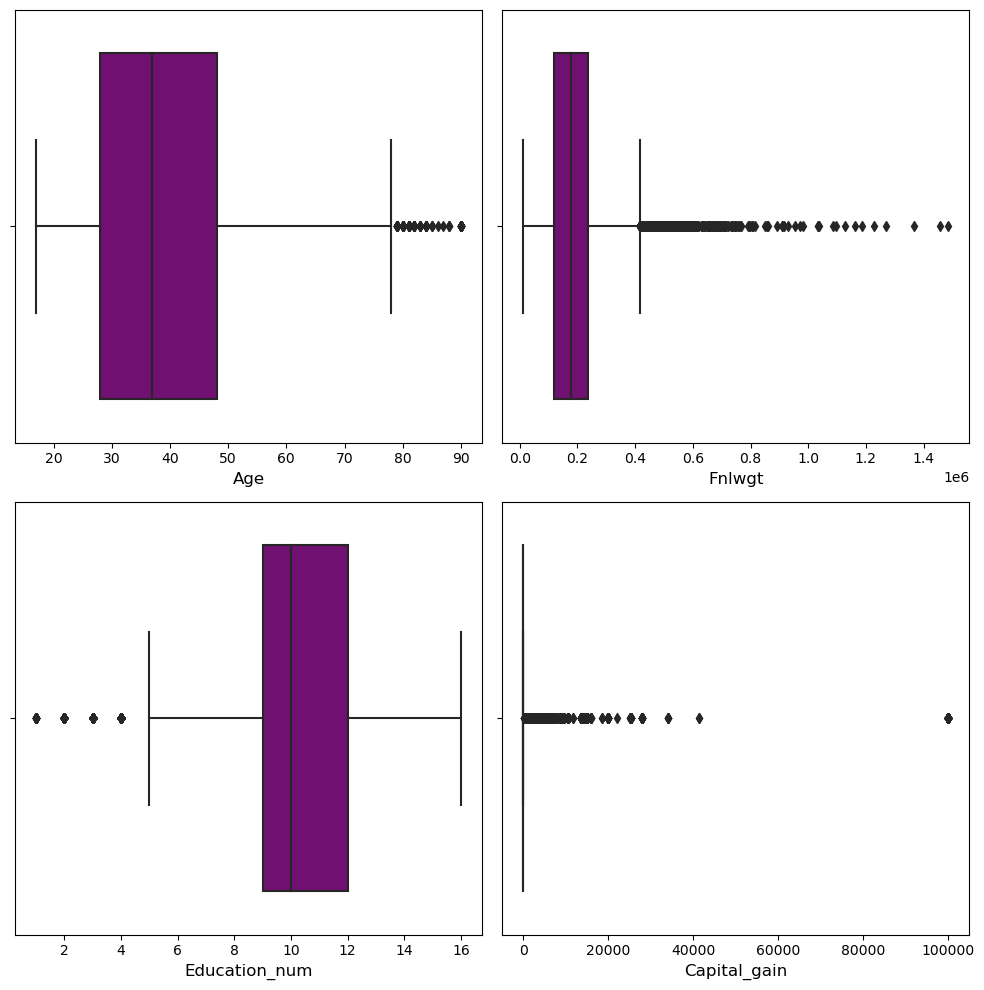

In [38]:
 # Identifying the outliers present in numerical columns using boxplot
plt.figure(figsize=(10,10))
plotnumber=1
for col in numerical_columns:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=col, data=df,color='purple')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()


In [39]:
# Separating Numerical & Categorical columns from the entire dataset
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int64']).columns
print('Separating Numerical & Categorical columns from the entire dataset:','\n')
print('Categorical columns are: ',categorical_columns)
print('\n')
print('Numerical_columns are: ',numerical_columns)

Separating Numerical & Categorical columns from the entire dataset: 

Categorical columns are:  Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')


Numerical_columns are:  Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')


OUTLIER TREATMENT USING Z SCORE METHOD

In [40]:
# Calculate the z-scores for the specified numerical columns
z = np.abs(zscore(df[numerical_columns]))

# Create a new DataFrame df1 with rows where z-scores are less than 3 for all numerical columns
df1 = df[(z < 3).all(axis=1)]
df1.shape

(29808, 15)

OUTLIER TREATMENT USING IQR METHOD

In [41]:
df2 = df.copy()
Q1 = df2.quantile(0)
Q3= df2.quantile(0.85)
IQR = Q3 - Q1

data = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(28253, 15)

DATA LOSS CALCULATION

In [42]:
# checking the data loss for zscore
data_loss_zscore = (32536-29808)/32536*100
print('Dataloss using zscore:',data_loss_zscore)

# checking the data loss for IQR
data_loss_IQR = (32536-28253)/32536*100
print('Dataloss using IQR:',data_loss_IQR)

Dataloss using zscore: 8.384558642734202
Dataloss using IQR: 13.16388000983526


In [43]:
# Choosing zscore for outlier treatment
df=df1
df.shape

(29808, 15)

# ENCODING CATEGORICAL COLUMNS

In [44]:
# Initating Label Encoder
le = LabelEncoder()

#Iterate over Categorical columns
for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,0,0,13,37,0
1,38,3,215646,10,9,0,5,1,4,1,0,0,40,37,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,37,0
3,28,3,338409,8,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,0,0,40,37,0


TRANSFORMED SUCCESFULLY ALL THE CATEGORICAL COLUMNS IN THE DATASET TO NUMERICAL COLUMNS ACCORDING TO THEIR VALUES IN EACH COLUMN

# CORRELATION

In [45]:
df_corr= df.corr()

In [46]:
df_corr

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032951,-0.074430,-0.004661,0.041431,-0.285335,-0.002594,-0.266802,0.027937,0.086589,0.131014,0.020820,0.091817,-0.001640,0.239314
Workclass,0.032951,1.000000,-0.022991,0.002653,-0.000674,-0.016093,0.008216,-0.057609,0.045442,0.068831,0.011974,-0.010143,0.027270,-0.001685,-0.007180
Fnlwgt,-0.074430,-0.022991,1.000000,-0.023083,-0.037725,0.029000,-0.002200,0.008349,-0.010514,0.028520,-0.002374,0.002579,-0.015489,-0.060659,-0.009160
Education,-0.004661,0.002653,-0.023083,1.000000,0.361097,-0.037416,-0.042764,-0.012924,0.015588,-0.027878,0.027164,-0.000924,0.060787,0.071462,0.074621
Education_num,0.041431,-0.000674,-0.037725,0.361097,1.000000,-0.059092,0.069639,-0.096694,0.028587,0.009276,0.154841,0.009481,0.150713,0.058248,0.318731
Marital_status,-0.285335,-0.016093,0.029000,-0.037416,-0.059092,1.000000,0.035351,0.184713,-0.066169,-0.123350,-0.068272,-0.013817,-0.195162,-0.016736,-0.194355
Occupation,-0.002594,0.008216,-0.002200,-0.042764,0.069639,0.035351,1.000000,-0.036558,-0.003263,0.049930,0.009530,-0.001857,-0.022743,-0.001708,0.030533
Relationship,-0.266802,-0.057609,0.008349,-0.012924,-0.096694,0.184713,-0.036558,1.000000,-0.116226,-0.577197,-0.090370,0.028830,-0.257798,-0.011165,-0.245913
Race,0.027937,0.045442,-0.010514,0.015588,0.028587,-0.066169,-0.003263,-0.116226,1.000000,0.089914,0.023537,0.001324,0.045400,0.117269,0.071755
Sex,0.086589,0.068831,0.028520,-0.027878,0.009276,-0.123350,0.049930,-0.577197,0.089914,1.000000,0.070813,-0.026354,0.233755,0.002282,0.209946


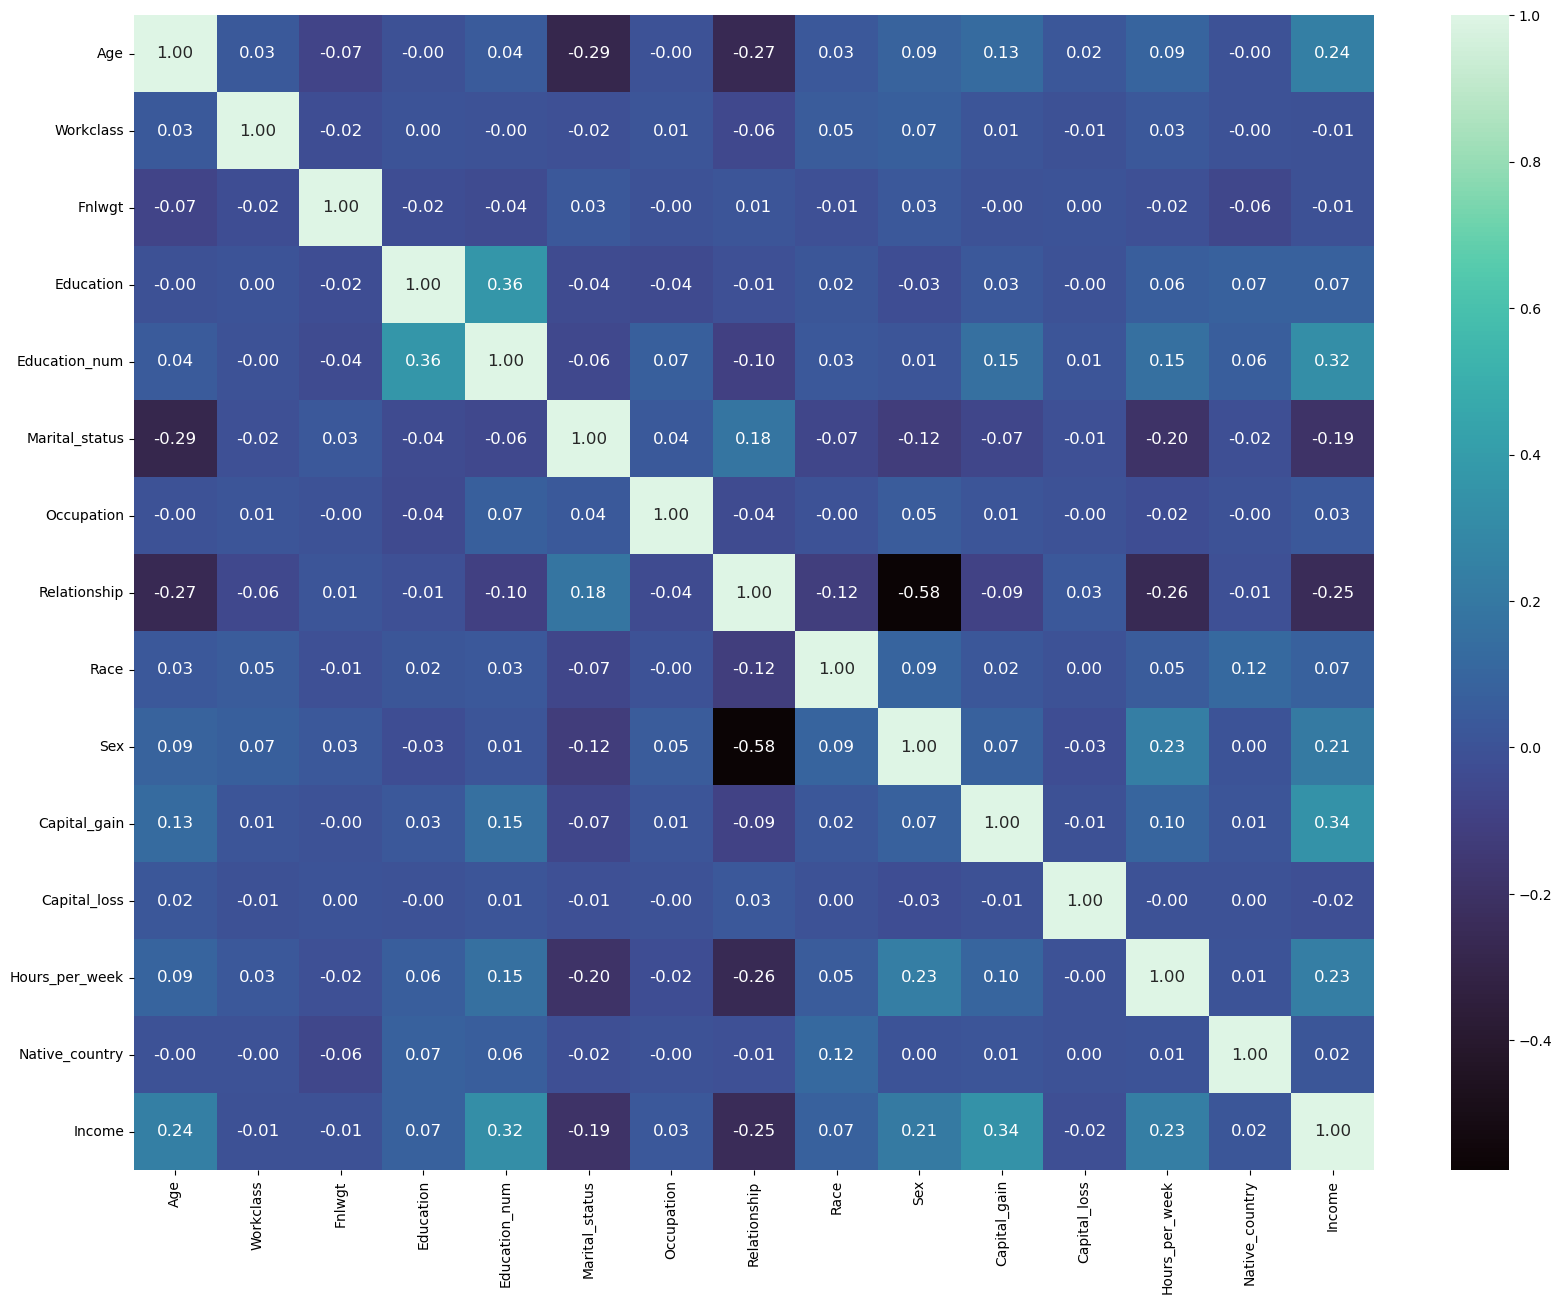

In [47]:
# Visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, fmt='.2F', cmap='mako', annot_kws={"size": 12})
plt.show()

This correlation matrix shows the relationship between different variables in a dataset. Each cell in the matrix shows the correlation coefficient between two variables. The correlation coefficient indicates the strength and direction of a linear relationship between two variables. 

For example, the correlation coefficient between age and education_num is 0.41, which indicates a moderate positive relationship between these two variables. On the other hand, the correlation coefficient between sex and relationship is -0.58, indicating a strong negative relationship between gender and relationship status.

Overall, this matrix can help us understand how different variables are related to each other in the dataset and identify potential patterns or trends.

In [48]:
# Find the columns with the maximum correlation
max_corr = 0
max_corr_cols = []
for i in range(len(df_corr.columns)):
    for j in range(i):
        if abs(df_corr.iloc[i, j]) > max_corr:
            max_corr = abs(df_corr.iloc[i, j])
            max_corr_cols = [df_corr.columns[i], df_corr.columns[j]]

print(f"Columns with maximum correlation: {max_corr_cols} with correlation value of {max_corr}")

Columns with maximum correlation: ['Sex', 'Relationship'] with correlation value of 0.5771969524882294


In [49]:
df.corr().abs().unstack().sort_values(ascending=False)

Age             Age               1.000000
Workclass       Workclass         1.000000
Native_country  Native_country    1.000000
Hours_per_week  Hours_per_week    1.000000
Capital_loss    Capital_loss      1.000000
                                    ...   
                Education         0.000924
Education_num   Workclass         0.000674
Workclass       Education_num     0.000674
Native_country  Capital_loss      0.000630
Capital_loss    Native_country    0.000630
Length: 225, dtype: float64

In [50]:
#correlation with target column
correlation_with_Income = df.corr()['Income'].abs().sort_values(ascending=False)
print(correlation_with_Income)

Income            1.000000
Capital_gain      0.342581
Education_num     0.318731
Relationship      0.245913
Age               0.239314
Hours_per_week    0.230589
Sex               0.209946
Marital_status    0.194355
Education         0.074621
Race              0.071755
Occupation        0.030533
Native_country    0.016792
Capital_loss      0.016606
Fnlwgt            0.009160
Workclass         0.007180
Name: Income, dtype: float64


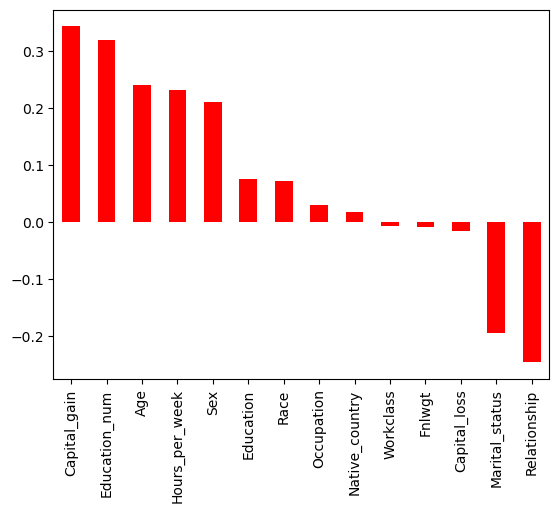

In [51]:
df.corr()['Income'].drop(['Income']).sort_values(ascending=False).plot(kind='bar', color='red')
plt.show()

SINCE THE TWO COLUMNS WORKCLASS AND FNLWGT HAVE VERY LOW CORRELATION VALUE AGINST THE THE TARGET VARIABLE INCOME THUS IT IS BETTER TO DROP THEM AS THEIR IMPORTANCE IN PREDICTING OUR TARGGET VARIABLE IS VERY LOW AND TO REDUCE MODEL LOAD AND INCREASE EFFICIENCY OF THE MODEL.

In [52]:
# dropping irrelevant columns
df.drop(columns = ['Fnlwgt','Workclass'],axis=1,inplace=True)

In [53]:
df.shape

(29808, 13)

# SPLITTING THE DATASET INTO TWO

In [54]:
# Splitting data in target and dependent feature
X = df.drop(['Income'], axis =1)
Y = df['Income']

# Checking the dimenstion of X & Y
X.shape, Y.shape   


((29808, 12), (29808,))

# FEATURE ENGINEERING

In [55]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
X = pd.DataFrame(X_scale, columns=X.columns)
X


,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.887304,-0.340122,1.191227,-0.410260,-0.780453,-0.919032,0.393999,0.716254,-0.244524,-0.036984,-2.415235,0.257250
1,-0.011046,0.249488,-0.439623,-1.730676,-0.278831,-0.297940,0.393999,0.716254,-0.244524,-0.036984,0.009070,0.257250
2,1.111891,-2.403756,-1.255048,-0.410260,-0.278831,-0.919032,-1.956981,0.716254,-0.244524,-0.036984,0.009070,0.257250
3,-0.759670,-0.340122,1.191227,-0.410260,0.724414,2.186429,-1.956981,-1.396153,-0.244524,-0.036984,0.009070,-5.413799
4,-0.085908,0.544293,1.598939,-0.410260,-0.780453,2.186429,0.393999,-1.396153,-0.244524,-0.036984,0.009070,0.257250
...,...,...,...,...,...,...,...,...,...,...,...,...
29803,-0.834532,-0.929731,0.783514,-0.410260,1.476848,2.186429,0.393999,-1.396153,-0.244524,-0.036984,-0.170508,0.257250
29804,0.138679,0.249488,-0.439623,-0.410260,-0.028019,-0.919032,0.393999,0.716254,-0.244524,-0.036984,0.009070,0.257250
29805,1.486203,0.249488,-0.439623,2.230572,-1.532886,1.565337,0.393999,-1.396153,-0.244524,-0.036984,0.009070,0.257250
29806,-1.208844,0.249488,-0.439623,0.910156,-1.532886,0.944244,0.393999,0.716254,-0.244524,-0.036984,-1.786711,0.257250


THE DATA IS NOW PROPERLY STANDERDISED AND READY

# MULLTICOLLINEARITY

In [56]:
vi = pd.DataFrame()
vi["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vi["Features"] = X.columns
vi


,VIF values,Features
0,1.172744,Age
1,1.162696,Education
2,1.218475,Education_num
3,1.137109,Marital_status
4,1.016283,Occupation
5,1.672411,Relationship
6,1.030979,Race
7,1.545478,Sex
8,1.049131,Capital_gain
9,1.002276,Capital_loss


# DATA IMBALANE

In [58]:
Y.value_counts()

0    23156
1     6652
Name: Income, dtype: int64

In [59]:
sm= SMOTE()
X,Y= sm.fit_resample(X,Y)
Y.value_counts()

0    23156
1    23156
Name: Income, dtype: int64

THE DATA IS NOW PROPERLY BALANCED AND USABLE.

# MODEL SELECTION

In [63]:
# Initialize all the classification models
LR_model = LogisticRegression()
Ridge_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SDG_model = SGDClassifier()
BG_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (ET_model, "ExtraTrees Classifier"),
    (Ridge_model, "RidgeClassifier"),
    (XGB_model, "XGBClassifier"),
    (SDG_model, "SGDClassifier"),
    (BG_model, "BaggingClassifier"),
    (ADA_model, "AdaBoostClassifier"),
]


In [64]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    best_cv_score = 0

    for random_state in range(1, 101):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    # Compute cross-validation score for the model after fitting
    cv_scores = cross_val_score(model, X, Y, cv=5)
    best_cv_score = cv_scores.mean()

    print(f"Model: {model_name}")
    print(f"Best Random State: {best_random_state}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")
    print(f"Support: {support}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Cross-Validation Score: {best_cv_score}")
    print("===" * 40)

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()],
        "Cross-Validation Score": best_cv_score
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model: Logistic Regression
Best Random State: 48
Accuracy: 0.7718439614221966
Precision: 0.7719594528400882
Recall: 0.7718439614221966
F1-Score: 0.771818770105549
Support: 13894.0
Confusion Matrix:
[[5288 1657]
 [1513 5436]]
Cross-Validation Score: 0.7641649349780159
Model: Decision Tree Classifier
Best Random State: 48
Accuracy: 0.859363754138477
Precision: 0.8593715657819672
Recall: 0.859363754138477
F1-Score: 0.8593631013801071
Support: 13894.0
Confusion Matrix:
[[5984  961]
 [ 993 5956]]
Cross-Validation Score: 0.8539925294927124
Model: K-Neighbors Classifier
Best Random State: 42
Accuracy: 0.8540377141212034
Precision: 0.858645359423018
Recall: 0.8540377141212034
F1-Score: 0.8535328426276728
Support: 13894.0
Confusion Matrix:
[[5513 1410]
 [ 618 6353]]
Cross-Validation Score: 0.84762102333935
Model: Random Forest Classifier
Best Random State: 2
Accuracy: 0.8855621131423637
Precision: 0.8855989836704189
Recall: 0.8855621131423637
F1-Score: 0.8855640338745371
Support: 13894.0
Confus

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
6,XGBClassifier,46,0.894055,0.894338,0.894055,0.894029,13894.0,"[[[6088, 831], [641, 6334]]]",0.885712
4,ExtraTrees Classifier,2,0.887074,0.887089,0.887074,0.887075,13894.0,"[[[6124, 766], [803, 6201]]]",0.889188
3,Random Forest Classifier,2,0.885562,0.885599,0.885562,0.885564,13894.0,"[[[6125, 765], [825, 6179]]]",0.884071
8,BaggingClassifier,2,0.874478,0.875129,0.874478,0.874448,13894.0,"[[[6158, 732], [1012, 5992]]]",0.873944
1,Decision Tree Classifier,48,0.859364,0.859372,0.859364,0.859363,13894.0,"[[[5984, 961], [993, 5956]]]",0.853993
2,K-Neighbors Classifier,42,0.854038,0.858645,0.854038,0.853533,13894.0,"[[[5513, 1410], [618, 6353]]]",0.847621
9,AdaBoostClassifier,46,0.851087,0.851829,0.851087,0.850991,13894.0,"[[[5722, 1197], [872, 6103]]]",0.839481
0,Logistic Regression,48,0.771844,0.771959,0.771844,0.771819,13894.0,"[[[5288, 1657], [1513, 5436]]]",0.764165
5,RidgeClassifier,30,0.768821,0.768855,0.768821,0.768786,13894.0,"[[[5214, 1663], [1549, 5468]]]",0.762502
7,SGDClassifier,60,0.766950,0.770942,0.766950,0.766208,13894.0,"[[[4957, 2032], [1206, 5699]]]",0.764489


THE TWO BEST MODEL FROM THE GGROUP OF CLASSIFICATION MODEL WHICH PERFORMED BEST ARE :

In [65]:
model_performance_df.head(2)

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix,Cross-Validation Score
6,XGBClassifier,46,0.894055,0.894338,0.894055,0.894029,13894.0,"[[[6088, 831], [641, 6334]]]",0.885712
4,ExtraTrees Classifier,2,0.887074,0.887089,0.887074,0.887075,13894.0,"[[[6124, 766], [803, 6201]]]",0.889188


# HYPERPARAMETER TUNING OF BEST MODELS

In [66]:
#Data splitting for train and test Data with best random state
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=46)

# Define the hyperparameters to search
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=XGB_model,
                                   param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Perform the random search on your training data
random_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a classifier with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the best classifier on the training data
best_xgb.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_xgb = best_xgb.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(Y_test, Y_pred_xgb)
print("Best Accuracy:", accuracy)

# Print classification report
class_report = classification_report(Y_test, Y_pred_xgb)
print("Classification Report:")
print(class_report)

# Perform cross-validation and print scores
cross_val_scores = cross_val_score(best_xgb, X_train, Y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Accuracy: 0.8880092126097596
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      6919
           1       0.88      0.91      0.89      6975

    accuracy                           0.89     13894
   macro avg       0.89      0.89      0.89     13894
weighted avg       0.89      0.89      0.89     13894

Cross-Validation Scores: [0.88433066 0.87893276 0.8821715  0.88431282 0.88739781]
Mean CV Score: 0.8834291089027697


ROC AUC Score Of XGB Classifier: 0.9673797575739014


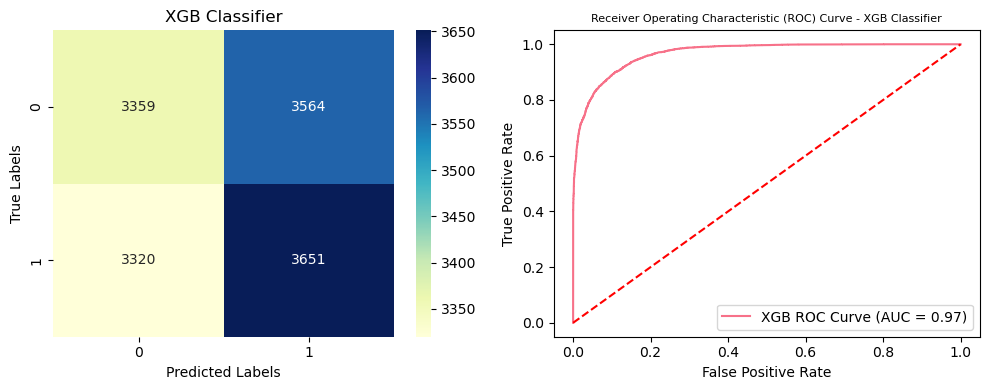

In [68]:
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot XGB Classifier Confusion Matrix
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('XGB Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')


# Calculate ROC AUC Score for xgb Classifier
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]
auc_score_xgb = roc_auc_score(Y_test, y_prob_xgb)
print("ROC AUC Score Of XGB Classifier:", auc_score_xgb)

# Calculate ROC curves for xgb classifiers
fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_prob_xgb)

# Plot ROC curve for XGB Classifier
axes[1].plot(fpr_xgb, tpr_xgb, label='XGB ROC Curve (AUC = {:.2f})'.format(auc_score_xgb))
axes[1].plot([0, 1], [0, 1], 'r--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - XGB Classifier', fontsize=8)
axes[1].legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Create the ExtraTrees classifier
etc = ExtraTreesClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(etc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Update the classifier with the best hyperparameters
best_etc = grid_search.best_estimator_

# Fit the classifier on the training data
best_etc.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = best_etc.predict(X_test)

# Evaluate the model
accuracy = best_etc.score(X_test, Y_test)
print("Accuracy:", accuracy)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
Best Accuracy: 0.8097740031668346
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      6923
           1       0.78      0.87      0.82      6971

    accuracy                           0.81     13894
   macro avg       0.81      0.81      0.81     13894
weighted avg       0.81      0.81      0.81     13894

Cross-Validation Scores: [0.79703886 0.7936459  0.79302899 0.79808731 0.78744408]
Mean CV Score: 0.7938490293457677


ROC AUC Score Of XGB Classifier: 0.8967034307521888


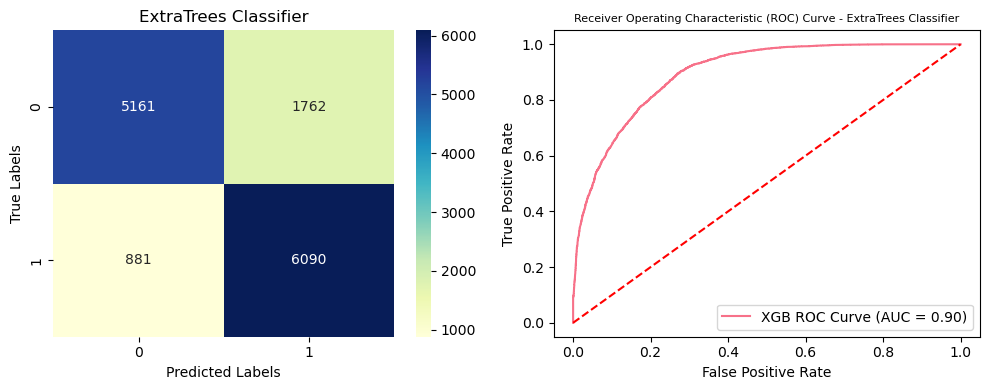

In [69]:
cm_et = confusion_matrix(Y_test, Y_pred_et)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot ExtraTrees Classifier Confusion Matrix
sns.heatmap(cm_et, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('ExtraTrees Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')


# Calculate ROC AUC Score for ExtraTrees Classifier
y_prob_et = best_et.predict_proba(X_test)[:, 1]
auc_score_et = roc_auc_score(Y_test, y_prob_et)
print("ROC AUC Score Of XGB Classifier:", auc_score_et)

# Calculate ROC curves for ExtraTrees Classifier
fpr_et, tpr_et, _ = roc_curve(Y_test, y_prob_et)

# Plot ROC curve for ExtraTrees Classifier
axes[1].plot(fpr_et, tpr_et, label='XGB ROC Curve (AUC = {:.2f})'.format(auc_score_et))
axes[1].plot([0, 1], [0, 1], 'r--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve - ExtraTrees Classifier', fontsize=8)
axes[1].legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

THE BEST PERFORMING MODEL IS XGBOOST AS ON THE BASIS OF ACCURACY IS SAVED

# SAVING THE MODEL

In [70]:
import pickle
filename= 'census_income.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))

# USING THE SAVED MODEL TO PREDICT

In [71]:
# Load the saved XGBClassifier model from the file
filename = 'census_income.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions on x_test
predicted = loaded_model.predict(X_test)

# Checking predicted and original values
original = np.array(Y_test)

# Create a DataFrame for comparison
Census_Income_Prediction = pd.DataFrame({'Original': original, 'Predicted': predicted})
print(Census_Income_Prediction)

# Calculate accuracy
accuracy = (Census_Income_Prediction['Original'] == Census_Income_Prediction['Predicted']).mean() * 100
print(f"Accuracy: {accuracy:.2f}%")

       Original  Predicted
0             1          1
1             0          0
2             0          0
3             0          0
4             0          0
...         ...        ...
13889         0          0
13890         0          0
13891         0          0
13892         1          1
13893         0          0

[13894 rows x 2 columns]
Accuracy: 89.37%
